In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from pandas.api.types import CategoricalDtype

df=pd.read_csv('cleaned_data.csv')
df.head(10)

,Unnamed: 0,Id,age,job,marital,education,credit_default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,1002,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
1,2,1003,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
2,3,1004,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
3,4,1005,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no
4,5,1006,35,management,married,tertiary,no,231.0,yes,no,unknown,5,may,139,1,-1,0,unknown,no
5,6,1007,28,management,single,tertiary,no,447.0,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
6,10,1011,41,admin.,divorced,secondary,no,270.0,yes,no,unknown,5,may,222,1,-1,0,unknown,no
7,11,1012,29,admin.,single,secondary,no,390.0,yes,no,unknown,5,may,137,1,-1,0,unknown,no
8,12,1013,53,technician,married,secondary,no,6.0,yes,no,unknown,5,may,517,1,-1,0,unknown,no
9,13,1014,58,technician,married,unknown,no,71.0,yes,no,unknown,5,may,71,1,-1,0,unknown,no


In [2]:
df.groupby('y').count()

,Unnamed: 0,Id,age,job,marital,education,credit_default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
y,,,,,,,,,,,,,,,,,,
no,39910,39910,39910,39910,39910,39910,39910,39910,39910,39910,39910,39910,39910,39910,39910,39910,39910,39910
yes,5286,5286,5286,5286,5286,5286,5286,5286,5286,5286,5286,5286,5286,5286,5286,5286,5286,5286


In [3]:
df['job'].value_counts()

blue-collar      9730
management       9456
technician       7594
admin.           5169
services         4153
retired          2262
self-employed    1579
entrepreneur     1485
unemployed       1303
housemaid        1240
student           937
unknown           288
Name: job, dtype: int64

In [4]:
df['marital'].value_counts()

married     27208
single      12782
divorced     5206
Name: marital, dtype: int64

In [5]:
df['education'].value_counts()

secondary    23197
tertiary     13295
primary       6849
unknown       1855
Name: education, dtype: int64

In [6]:
df['contact'].value_counts()

cellular     29282
unknown      13008
telephone     2906
Name: contact, dtype: int64

In [7]:
df['month'].value_counts()

may    13754
jul     6895
aug     6247
jun     5341
nov     3967
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

# How total balance is vary in each contact month

In [8]:
df["month"]

0        may
1        may
2        may
3        may
4        may
        ... 
45191    nov
45192    nov
45193    nov
45194    nov
45195    nov
Name: month, Length: 45196, dtype: object

In [9]:
month_balance=pd.DataFrame(df.groupby('month').sum()['balance'].reset_index())
month_balance

,month,balance
0,apr,4522760.0
1,aug,8918853.0
2,dec,495554.0
3,feb,3494293.0
4,jan,1328337.0
5,jul,6205676.0
6,jun,8589515.0
7,mar,976051.0
8,may,14243852.0
9,nov,9972876.0


In [10]:
df_mapping = pd.DataFrame({
    'new_order': ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"],
})
sort_mapping = df_mapping.reset_index().set_index('new_order')

In [11]:
month_balance['size_num'] = month_balance['month'].map(sort_mapping['index'])

In [12]:
sort_month=month_balance.sort_values('size_num')

In [13]:
sort_month

,month,balance,size_num
4,jan,1328337.0,0
3,feb,3494293.0,1
7,mar,976051.0,2
0,apr,4522760.0,3
8,may,14243852.0,4
6,jun,8589515.0,5
5,jul,6205676.0,6
1,aug,8918853.0,7
11,sep,1128061.0,8
10,oct,1706530.0,9


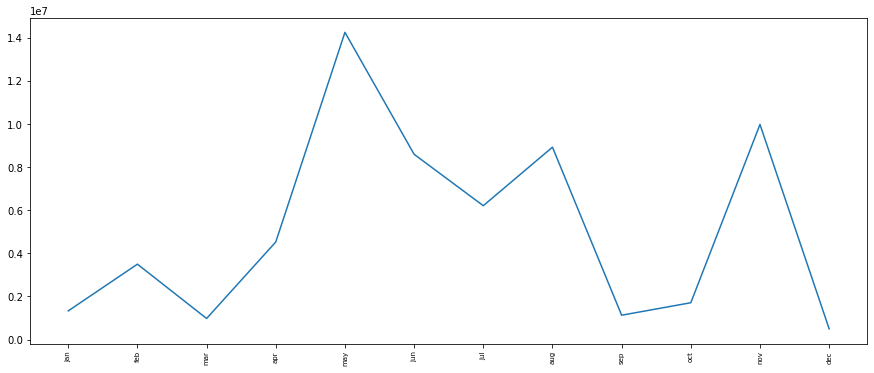

In [14]:
plt.figure(figsize=(15,6))
plt.plot(sort_month['month'],sort_month['balance'],)
plt.xticks(rotation="vertical", size="7")
plt.show()

# How total contact duration vary with in each contact month

In [15]:
month_duration=pd.DataFrame(df.groupby('month').sum()['duration'].reset_index())
month_duration

,month,duration
0,apr,874026
1,aug,1451816
2,dec,70476
3,feb,657742
4,jan,376313
5,jul,1847690
6,jun,1298332
7,mar,116579
8,may,3587786
9,nov,1004048


In [16]:
month_duration['size_num'] = month_duration['month'].map(sort_mapping['index'])

In [17]:
sort_month=month_duration.sort_values('size_num')
sort_month

,month,duration,size_num
4,jan,376313,0
3,feb,657742,1
7,mar,116579,2
0,apr,874026,3
8,may,3587786,4
6,jun,1298332,5
5,jul,1847690,6
1,aug,1451816,7
11,sep,169214,8
10,oct,212767,9


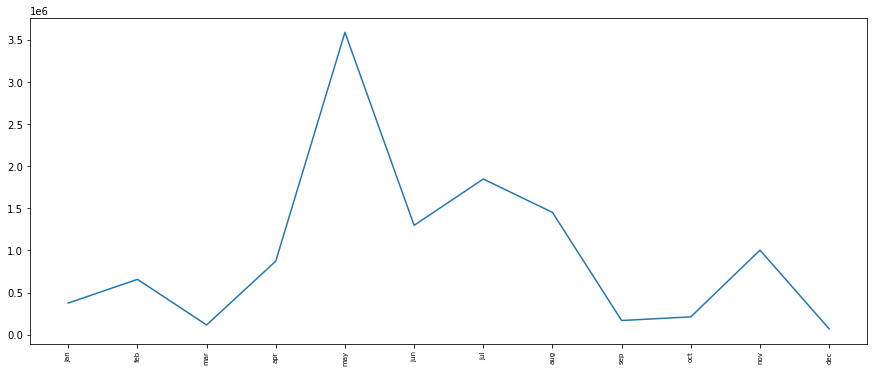

In [18]:
plt.figure(figsize=(15,6))
plt.plot(sort_month['month'],sort_month['duration'],)
plt.xticks(rotation="vertical", size="7")
plt.show()

# Top 5 jobs by balance

In [19]:
df.groupby('job').sum()['balance']

job
admin.            5873499.0
blue-collar      10498811.0
entrepreneur      2262181.0
housemaid         1726570.0
management       16677721.0
retired           4489292.0
self-employed     2602146.0
services          4141725.0
student           1301888.0
technician        9515251.0
unemployed        1982835.0
unknown            510439.0
Name: balance, dtype: float64

In [20]:
job_balance=pd.DataFrame(df.groupby('job').sum()['balance'])
job_balance

,balance
job,
admin.,5873499.0
blue-collar,10498811.0
entrepreneur,2262181.0
housemaid,1726570.0
management,16677721.0
retired,4489292.0
self-employed,2602146.0
services,4141725.0
student,1301888.0


In [21]:
job_balance=job_balance.sort_values('balance',ascending=False)

In [22]:
job_balance[0:5]

,balance
job,
management,16677721.0
blue-collar,10498811.0
technician,9515251.0
admin.,5873499.0
retired,4489292.0


# House loan & Personal loan

In [23]:
df.pivot_table('duration',index='housing' ,columns='loan' , aggfunc='count')

loan,no,yes
housing,,
no,17202,2875
yes,20753,4366


# Mean values of balance in levels of y(yes, no)

In [24]:
df.groupby(['y'])['balance'].mean().sort_values(ascending=False)

y
yes    1804.635830
no     1304.010348
Name: balance, dtype: float64

In [25]:
df[['pdays', 'campaign', 'previous']].describe()

,pdays,campaign,previous
count,45196.000000,45196.000000,45196.000000
mean,40.210594,2.764404,0.580339
std,100.142735,3.098377,2.303536
min,-1.000000,1.000000,0.000000
25%,-1.000000,1.000000,0.000000
50%,-1.000000,2.000000,0.000000
75%,-1.000000,3.000000,0.000000
max,871.000000,63.000000,275.000000


# In each job type total balance of the clients who subscribed the deposit

In [26]:
job_y = pd.DataFrame(df.groupby(['job', 'y']).sum()['balance'])

In [27]:
job_y

balance
job           y              
admin.        no    4966573.0
              yes    906926.0
blue-collar   no    9595813.0
              yes    902998.0
entrepreneur  no    2038447.0
              yes    223734.0
housemaid     no    1531080.0
              yes    195490.0
management    no   13892660.0
              yes   2785061.0
retired       no    3103778.0
              yes   1385514.0
self-employed no    2162358.0
              yes    439788.0
services      no    3731270.0
              yes    410455.0
student       no     901530.0
              yes    400358.0
technician    no    7971708.0
              yes   1543543.0
unemployed    no    1713315.0
              yes    269520.0
unknown       no     434521.0
              yes     75918.0

Text(0.5, 1.0, 'deposit Records')

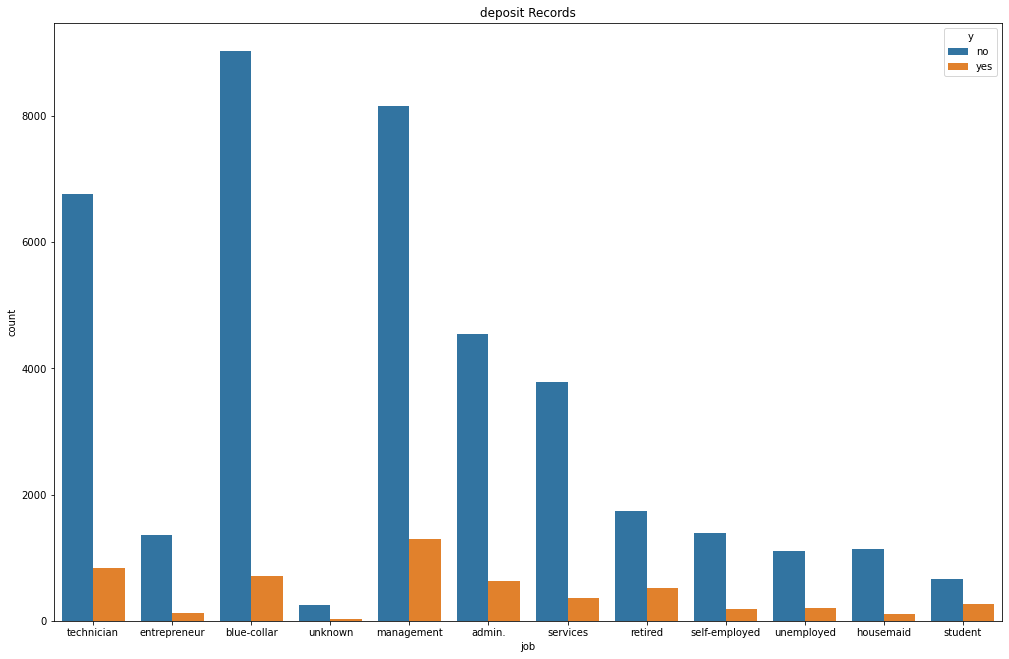

In [28]:
plt.figure(figsize=(17,11))
sns.countplot(x='job', hue='y', data=df).set_title("deposit Records")

# In each education level total balance of the clients who subscribed the deposit

In [29]:
education_y = pd.DataFrame(df.groupby(['education', 'y']).sum()['balance'])

In [30]:
education_y

balance
education y              
primary   no    7473866.0
          yes   1096092.0
secondary no   23120651.0
          yes   3671124.0
tertiary  no   19176154.0
          yes   4209618.0
unknown   no    2272382.0
          yes    562471.0

Text(0.5, 1.0, 'deposit Records')

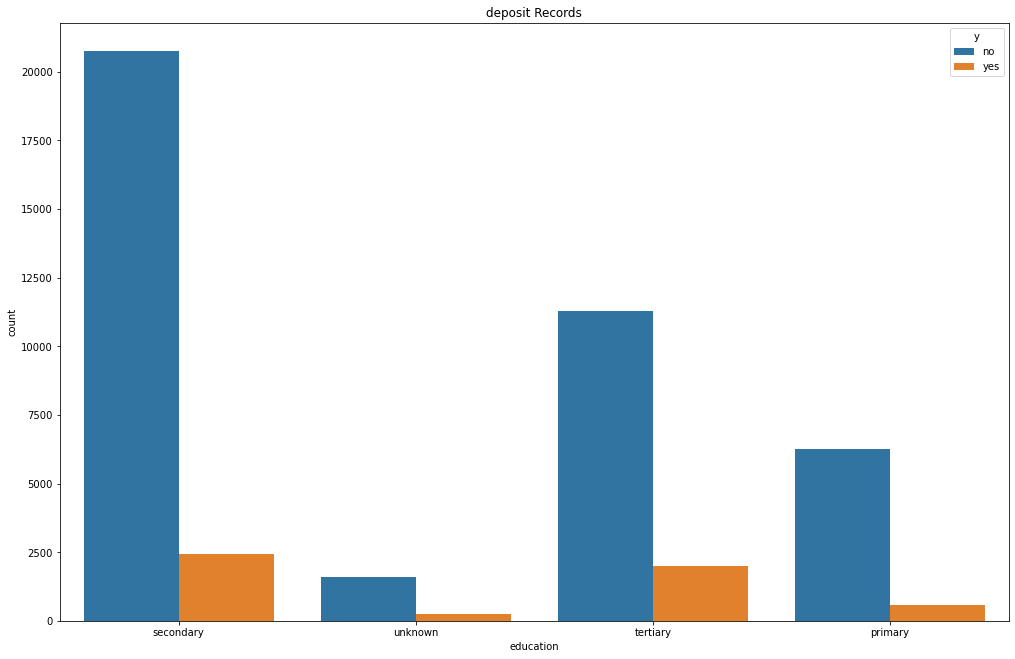

In [31]:
plt.figure(figsize=(17,11))
sns.countplot(x='education', hue='y', data=df).set_title("deposit Records")